# DNN Classification with Tensorflow

## Prepare the data

### Import libraries and load the dataset

In [1]:
# import the libraries we will use
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# read a CSV file, french style
df = pd.read_csv('Churn.csv',sep=',')

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Split into training & testing data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Separete the input data and the value to predict (the 'Exited' column).
# By convention: X is the input data and Y is the value to predict.
x_data = df.drop(['Exited'],axis=1)
y_val = df['Exited']

In [45]:
# Separate the dataset in two parts:
# 70% of the data will be used for training the model
# 30% to test it
X_train, X_test, y_train, y_true = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [46]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,804,15712825,Howells,511,Spain,Female,29,9,0.00,2,0,1,140676.98
1387,1388,15674526,Byrne,725,France,Male,66,4,86459.80,1,1,1,141476.56
921,922,15743411,Chiawuotu,609,Spain,Male,61,1,0.00,1,1,0,22447.85
5917,5918,15812184,Rose,674,France,Female,31,1,0.00,1,1,0,128954.05
9610,9611,15812534,Chiemenam,455,France,Male,40,1,0.00,3,0,1,129975.34
6225,6226,15742172,Williamson,598,Germany,Male,32,9,123938.60,2,1,0,198894.42
6167,6168,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60
3628,3629,15573319,Azubuike,493,Germany,Female,35,8,178317.60,1,0,0,197428.64
1199,1200,15769169,Trentino,645,France,Male,41,7,0.00,1,0,1,28667.56
6506,6507,15702095,Clarke,585,Spain,Female,56,1,128472.80,1,1,0,186476.91


### Scale the data

In [47]:
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [48]:
# Get around a bug in Sklearn / Pandas integration
# see https://stackoverflow.com/questions/45090639/pandas-shows-settingwithcopywarning-after-train-test-split
X_train.is_copy=None
X_test.is_copy=None

In [49]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,804,15712825,Howells,511,Spain,Female,29,9,0.0,2,0,1,140676.98
1387,1388,15674526,Byrne,725,France,Male,66,4,86459.8,1,1,1,141476.56
921,922,15743411,Chiawuotu,609,Spain,Male,61,1,0.0,1,1,0,22447.85
5917,5918,15812184,Rose,674,France,Female,31,1,0.0,1,1,0,128954.05
9610,9611,15812534,Chiemenam,455,France,Male,40,1,0.0,3,0,1,129975.34


In [50]:
# apply min-max normalisation to specified columns
for col in cols_to_scale:
    xmin=X_train[col].min()
    dx=X_train[col].max()-xmin
    X_train[[col]] = X_train[[col]].apply(lambda x: ((x - xmin) / dx))
    X_test[[col]] = X_test[[col]].apply(lambda x: ((x - xmin) / dx))

In [51]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,804,15712825,Howells,0.322,Spain,Female,29,0.9,0.000000,0.333333,0,1,0.703471
1387,1388,15674526,Byrne,0.750,France,Male,66,0.4,0.344601,0.000000,1,1,0.707469
921,922,15743411,Chiawuotu,0.518,Spain,Male,61,0.1,0.000000,0.000000,1,0,0.112204
5917,5918,15812184,Rose,0.648,France,Female,31,0.1,0.000000,0.000000,1,0,0.644844
9610,9611,15812534,Chiemenam,0.210,France,Male,40,0.1,0.000000,0.666667,0,1,0.649952


In [52]:
# X_train.describe()

## Create the tensorflow estimator

In [53]:
import tensorflow as tf

### Create the 'feature columns'

In [54]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [55]:
# create the numeric columns
age = tf.feature_column.numeric_column('Age')
creditscore = tf.feature_column.numeric_column('CreditScore')
tenure = tf.feature_column.numeric_column('Tenure')
balance = tf.feature_column.numeric_column('Balance')
numproducts = tf.feature_column.numeric_column('NumOfProducts')
hascard = tf.feature_column.numeric_column('HasCrCard')
isactive = tf.feature_column.numeric_column('IsActiveMember')
estimated = tf.feature_column.numeric_column('EstimatedSalary')

In [56]:
# create categorical columns
geography = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(key='Geography',vocabulary_list=df['Geography'].unique()))
gender = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(key='Gender',vocabulary_list=df['Gender'].unique()))

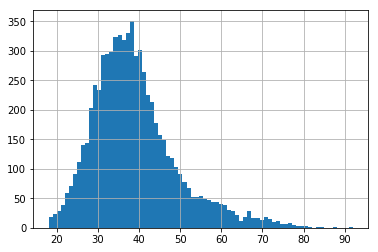

In [57]:
X_train['Age'].hist(bins=75)

In [58]:
# Discretize the age column 
#age_b = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [59]:
feat_cols = [age,creditscore,tenure,balance,numproducts,hascard,isactive,estimated,geography,gender ]

### Create the input functions

In [60]:
# A first input function for training: feed the model with the training data & result
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [61]:
# A second input function for testing: feed the model with the test data
test_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      num_epochs=1,
      shuffle=False)

### Create the estimator and train it

In [62]:
# Create a neural network with 3 layers of 10 neurons each
model = tf.estimator.DNNClassifier(hidden_units=[8],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_model_dir': '/var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpme6dilcc', '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_summary_steps': 100}


In [63]:
# 7000 entries in X_train data = 1 epoch = 700 steps with batch of 10
# Go through the whole data set one time
model.train(input_fn=train_input_fn,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpme6dilcc/model.ckpt.
INFO:tensorflow:step = 1, loss = 23.5381
INFO:tensorflow:global_step/sec: 230.458
INFO:tensorflow:step = 101, loss = 5.38203 (0.435 sec)
INFO:tensorflow:global_step/sec: 244.038
INFO:tensorflow:step = 201, loss = 3.38444 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.668
INFO:tensorflow:step = 301, loss = 6.45887 (0.421 sec)
INFO:tensorflow:global_step/sec: 248.296
INFO:tensorflow:step = 401, loss = 2.56445 (0.397 sec)
INFO:tensorflow:global_step/sec: 237.406
INFO:tensorflow:step = 501, loss = 4.12874 (0.426 sec)
INFO:tensorflow:global_step/sec: 237.565
INFO:tensorflow:step = 601, loss = 3.25 (0.416 sec)
INFO:tensorflow:global_step/sec: 241.188
INFO:tensorflow:step = 701, loss = 4.51032 (0.415 sec)
INFO:tensorflow:global_step/sec: 271.218
INFO:tensorflow:step = 801, loss = 3.59721 (0.369 sec)
INFO:tensorflow:global_step/sec

## Evaluate our estimator

In [64]:
predictions = model.predict(test_input_func)
pred_list = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpme6dilcc/model.ckpt-1000


In [65]:
y_pred = []
for p in pred_list:
    y_pred.append(p['class_ids'][0])

### Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [68]:
# Confusion matrix for prediction
cmp=confusion_matrix(y_true, y_pred)

In [69]:
cmp

array([[2358,   20],
       [ 574,   48]])

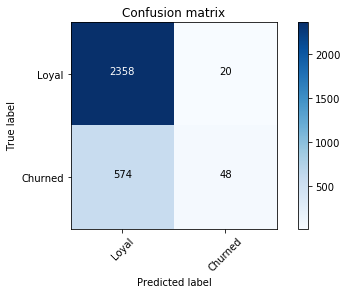

In [70]:
plot_confusion_matrix(cmp,["Loyal","Churned"])

### Classification Report

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_true,y_pred,target_names=["Loyal (0)","Churned (1)"]))

             precision    recall  f1-score   support

  Loyal (0)       0.84      0.97      0.90      2378
Churned (1)       0.71      0.28      0.40       622

avg / total       0.81      0.83      0.79      3000

